**Variables of interest**
- Accidental discharge of firearms (W32-W34)
- intentional self-harm (suicide) by discharge of firearms (X72-X74)
- Assault (homicide) by discharge of firearms (*U01.4, X93-X95)
- Discharge of firearms, undetermined intent (Y22-Y24)

# Notes

**Notes**:
Dataset: Underlying Cause of Death, 1999-2020
Query Parameters:
Title: Second Table Synth
Injury Intent: Unintentional; Suicide; Homicide; Undetermined
Injury Mechanism & All Other Leading Causes: Firearm
Group By: State; Injury Intent; Year; Race
Show Totals: Disabled
Show Zero Values: False
Show Suppressed: False
Calculate Rates Per: 100,000
Rate Options: Default intercensal populations for years 2001-2009 (except Infant Age Groups)
---
Help: See http://wonder.cdc.gov/wonder/help/ucd.html for more information.
---
Query Date: Mar 6, 2022 9:15:55 PM
---
Suggested Citation: Centers for Disease Control and Prevention, National Center for Health Statistics. Underlying Cause of Death
1999-2020 on CDC WONDER Online Database, released in 2021. Data are from the Multiple Cause of Death Files, 1999-2020, as
compiled from data provided by the 57 vital statistics jurisdictions through the Vital Statistics Cooperative Program. Accessed
at http://wonder.cdc.gov/ucd-icd10.html on Mar 6, 2022 9:15:55 PM
---
Messages:
1. Totals are not available for these results due to suppression constraints. More Information:
http://wonder.cdc.gov/wonder/help/faq.html#Privacy.
2. Rows with suppressed Deaths are hidden. Use Quick Options above to show suppressed rows.
---
Caveats:
1. As of April 3, 2017, the underlying cause of death has been revised for 125 deaths in 2014. More information:
http://wonder.cdc.gov/wonder/help/ucd.html#2014-Revision.
2. Circumstances in Georgia for the years 2008 and 2009 have resulted in unusually high death counts for the ICD-10 cause of
death code R99, "Other ill-defined and unspecified causes of mortality." Caution should be used in interpreting these data.
More information: http://wonder.cdc.gov/wonder/help/ucd.html#Georgia-Reporting-Anomalies.
3. Circumstances in New Jersey for the year 2009 have resulted in unusually high death counts for the ICD-10 cause of death code
R99, "Other ill-defined and unspecified causes of mortality" and therefore unusually low death counts in other ICD-10 codes,
most notably R95, "Sudden Infant Death Syndrome" and X40-X49, "Unintentional poisoning." Caution should be used in
interpreting these data. More information: http://wonder.cdc.gov/wonder/help/ucd.html#New-Jersey-Reporting-Anomalies.
4. Circumstances in California resulted in unusually high death counts for the ICD-10 cause of death code R99, "Other
ill-defined and unspecified causes of mortality" for deaths occurring in years 2000 and 2001. Caution should be used in
interpreting these data. More information: http://wonder.cdc.gov/wonder/help/ucd.html#California-Reporting-Anomalies.
5. Data are Suppressed when the data meet the criteria for confidentiality constraints. More information:
http://wonder.cdc.gov/wonder/help/ucd.html#Assurance of Confidentiality.
6. Death rates are flagged as Unreliable when the rate is calculated with a numerator of 20 or less. More information:
http://wonder.cdc.gov/wonder/help/ucd.html#Unreliable.
7. Information included on the death certificate about the race and Hispanic ethnicity of the decedent is reported by the
funeral director as provided by an informant, often the surviving next of kin, or, in the absence of an informant, on the basis
of observation. Race and ethnicity information from the census is by self-report. To the extent that race and Hispanic origin
are inconsistent between these two data sources, death rates will be biased. More information:
http://wonder.cdc.gov/wonder/help/ucd.html#Racial Differences.
8. The population figures for year 2020 are bridged-race estimates of the July 1 resident population, from the Vintage 2020
postcensal series released by NCHS on September 22, 2021. The population figures for year 2019 are bridged-race estimates of the
July 1 resident population, from the Vintage 2019 postcensal series released by NCHS on July 9, 2020. The population figures for
year 2018 are bridged-race estimates of the July 1 resident population, from the Vintage 2018 postcensal series released by NCHS
on June 25, 2019. The population figures for year 2017 are bridged-race estimates of the July 1 resident population, from the
Vintage 2017 postcensal series released by NCHS on June 27, 2018. The population figures for year 2016 are bridged-race
estimates of the July 1 resident population, from the Vintage 2016 postcensal series released by NCHS on June 26, 2017. The
population figures for year 2015 are bridged-race estimates of the July 1 resident population, from the Vintage 2015 postcensal
series released by NCHS on June 28, 2016. The population figures for year 2014 are bridged-race estimates of the July 1 resident
population, from the Vintage 2014 postcensal series released by NCHS on June 30, 2015. The population figures for year 2013 are
bridged-race estimates of the July 1 resident population, from the Vintage 2013 postcensal series released by NCHS on June 26,
2014. The population figures for year 2012 are bridged-race estimates of the July 1 resident population, from the Vintage 2012
postcensal series released by NCHS on June 13, 2013. The population figures for year 2011 are bridged-race estimates of the July
1 resident population, from the Vintage 2011 postcensal series released by NCHS on July 18, 2012. Population figures for 2010
are April 1 Census counts. The population figures for years 2001 - 2009 are bridged-race estimates of the July 1 resident
population, from the revised intercensal county-level 2000 - 2009 series released by NCHS on October 26, 2012. Population
figures for 2000 are April 1 Census counts. Population figures for 1999 are from the 1990-1999 intercensal series of July 1
estimates. Population figures for the infant age groups are the number of live births. <br/><b>Note:</b> Rates and population
figures for years 2001 - 2009 differ slightly from previously published reports, due to use of the population estimates which
were available at the time of release.
9. The population figures used in the calculation of death rates for the age group 'under 1 year' are the estimates of the
resident population that is under one year of age. More information: http://wonder.cdc.gov/wonder/help/ucd.html#Age Group.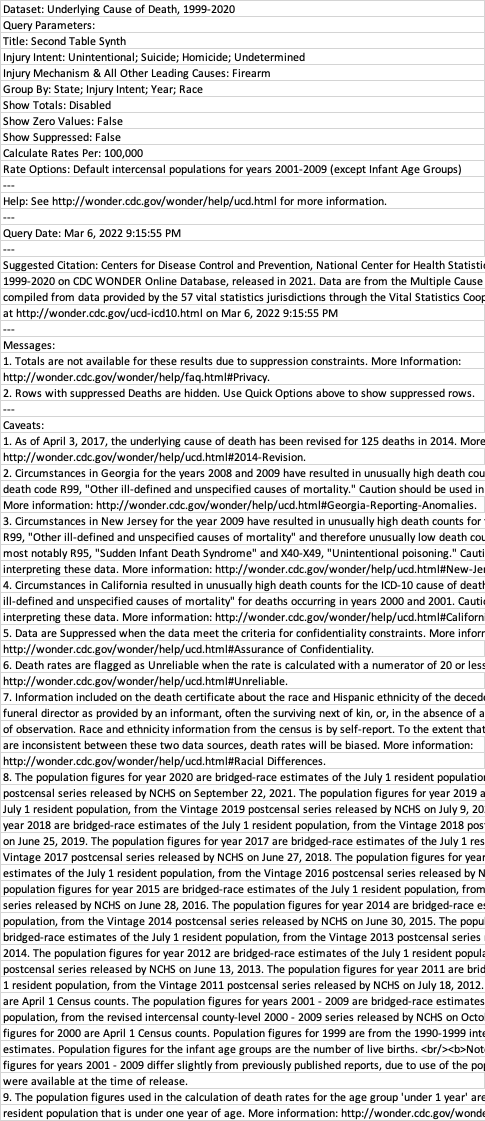

# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pystout import pystout
import sidetable

In [2]:
df = pd.read_excel('../data/cdc_wonder.xlsx')
df = df[['State', 'Injury Intent', 'Year', 'Race', 'Deaths', 'Population', 'Crude Rate']]
df['Crude Rate'] = df['Crude Rate'].replace(r'Unreliable', np.NaN, regex=True)
df['Race'] = df['Race'].replace('Black or African American', 'African American', regex = True)
df['Race'] = df['Race'].replace('American Indian or Alaska Native', 'American Indian', regex = True)
df['Race'] = df['Race'].replace('Asian or Pacific Islander', 'Asian', regex = True)
violent_state = df[(df['State'] == 'Texas') | (df['State'] == 'California') | (df['State'] == 'Arizona') | (df['State'] == 'North Carolina') | (df['State'] == 'Oklahoma')]

# Visualizations & Tables

In [ ]:
#export descriptive statistics to excel
pd.set_option('display.float_format', str)
writer = pd.ExcelWriter('../tables/descriptive_statistics.xlsx',engine='xlsxwriter')
print(df.describe().round(3).to_latex())
print(df.stb.freq(['State']).round(3).to_latex())
print(df.stb.freq(['Injury Intent']).round(3).to_latex())
print(df.stb.freq(['Race']).round(3).to_latex())

Text(-1.3, -0.3, 'Source: Center for Disease Control')

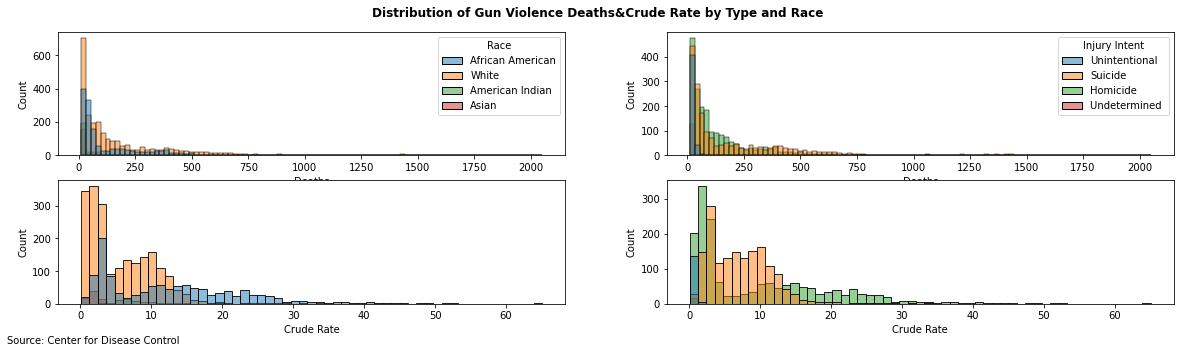

In [35]:
#DISTRIBUTION OF VARIABLES
f, axes1 = plt.subplots(2, 2, figsize=(20,5))
f.suptitle('Distribution of Gun Violence Deaths&Crude Rate by Type and Race', y = 0.95, fontweight = 'bold')
sns.histplot(df, x="Deaths", hue="Race", ax = axes1[0][0])
sns.histplot(df, x="Deaths", hue="Injury Intent", ax = axes1[0][1])
sns.histplot(df, x="Crude Rate", hue="Race", ax = axes1[1][0], legend = False)
sns.histplot(df, x="Crude Rate", hue="Injury Intent", ax = axes1[1][1], legend = False)
plt.annotate('Source: Center for Disease Control', xy = (-1.3, -0.3),
            xycoords='axes fraction',
            ha='left',
            va="center",
            fontsize=10)

Text(-1.3, -0.2, 'Source: Center for Disease Control')

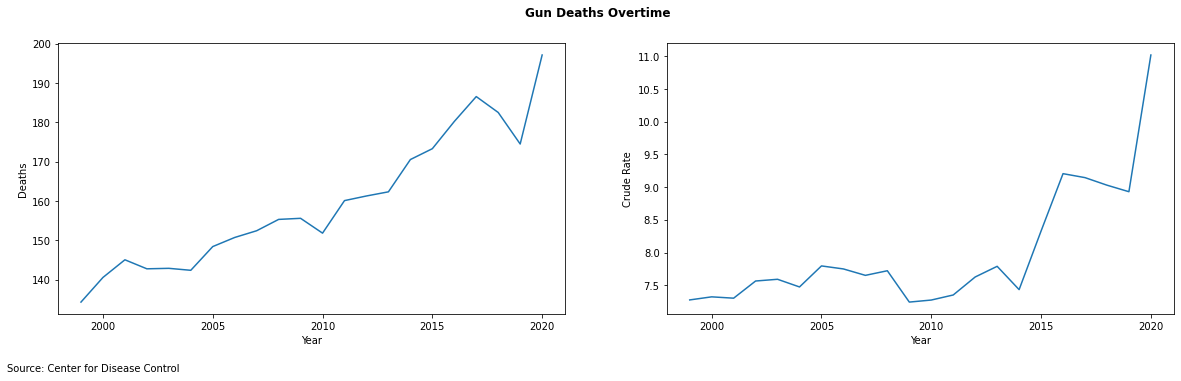

In [48]:
#GUN DEATHS OVERTIME (A)
f,axes = plt.subplots(1, 2, figsize = (20, 5))
f.suptitle('Gun Deaths Overtime', y = 0.98, fontweight = 'bold')
sns.lineplot(x=df['Year'], y=df['Deaths'], data = df, ci = None, ax = axes[0], palette = 'PuBuGn')
sns.lineplot(x=df['Year'], y=df['Crude Rate'], data = df, ci = None, ax = axes[1], palette = 'RED')
plt.annotate('Source: Center for Disease Control', xy = (-1.3, -0.2),
            xycoords='axes fraction',
            ha='left',
            va="center",
            fontsize=10)


Text(-1.3, -0.2, 'Source: Center for Disease Control')

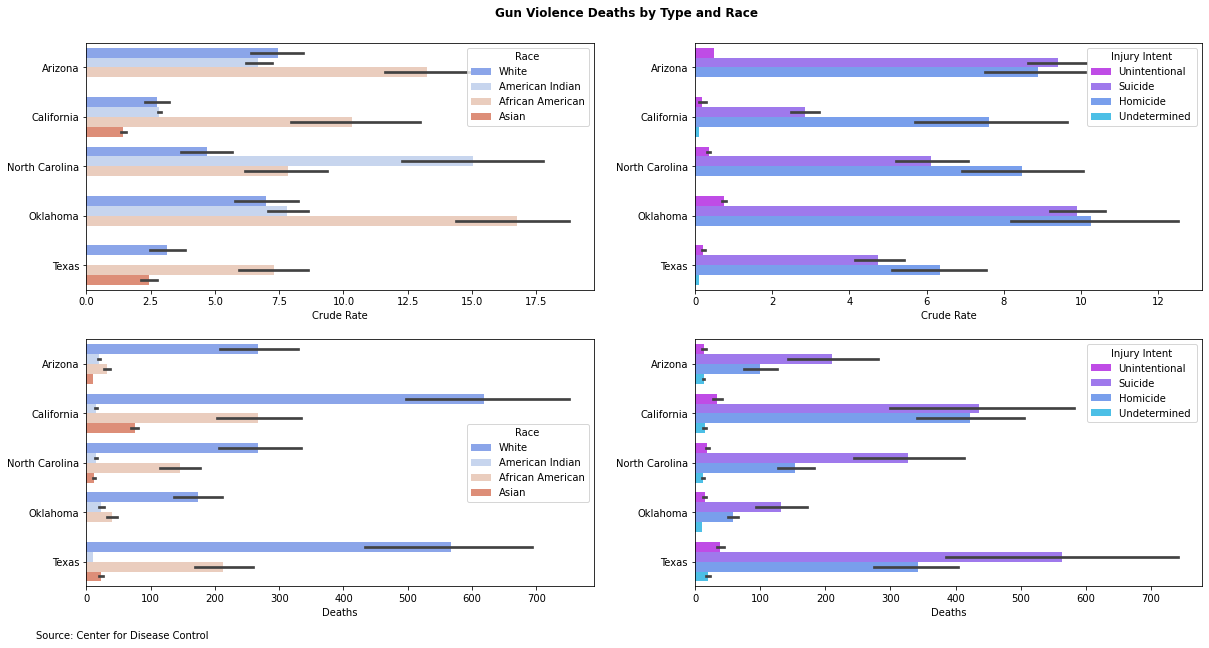

In [67]:
#GUN DEATHS BY TYPE BY STATE
f, axes2 = plt.subplots(2, 2, figsize=(20,10))
f.suptitle('Gun Violence Deaths by Type and Race', y = 0.93, fontweight = 'bold')
sns.barplot(x='Crude Rate', y='State', hue = 'Race', ax = axes2[0][0], palette = 'coolwarm', data = violent_state)
sns.barplot(x='Crude Rate', y='State', hue = 'Injury Intent', ax = axes2[0][1], palette = 'cool_r', data = violent_state);
sns.barplot(x='Deaths', y='State', hue = 'Race', ax = axes2[1][0], palette = 'coolwarm', data = violent_state)
sns.barplot(x='Deaths', y='State', hue = 'Injury Intent', ax = axes2[1][1], palette = 'cool_r', data = violent_state);
axes2[0][0].set(ylabel=None)
axes2[0][1].set(ylabel=None)
axes2[1][0].set(ylabel=None)
axes2[1][1].set(ylabel=None)
plt.annotate('Source: Center for Disease Control', xy = (-1.3, -0.2),
            xycoords='axes fraction',
            ha='left',
            va="center",
            fontsize=10)



Text(-1.3, -0.2, 'Source: Center for Disease Control')

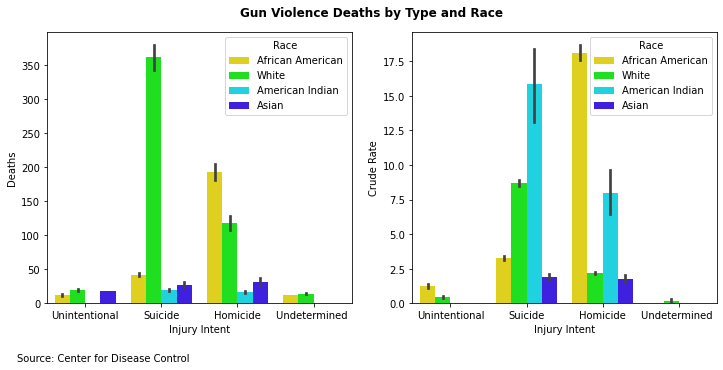

In [82]:
#GUN DEATHS BY INJURY INTENT & RACE
f, axes3 = plt.subplots(1, 2, figsize=(12,5))
f.suptitle('Gun Violence Deaths by Type and Race', y = 0.95, fontweight = 'bold')
sns.barplot(x=df['Injury Intent'], y=df['Deaths'], ax = axes3[0], hue = df['Race'], data = df, palette = 'gist_rainbow');
sns.barplot(x=df['Injury Intent'], y=df['Crude Rate'], ax = axes3[1], hue = df['Race'], data = df, palette = 'gist_rainbow');
plt.annotate('Source: Center for Disease Control', xy = (-1.3, -0.2),
            xycoords='axes fraction',
            ha='left',
            va="center",
            fontsize=10)

In [ ]:
#GUN DEAHTHS OVER TIME (A)
f, axes4 = plt.subplots(3, 1, figsize=(12,10))
sns.lineplot(x="Year", y="Crude Rate", hue="Race", data=df, ax = axes4[0], palette = 'BuPu', ci = None)
sns.move_legend(axes4[0], "upper left", bbox_to_anchor=(1, .52))
sns.lineplot(x="Year", y="Crude Rate", hue="Injury Intent", data=df, ax = axes4[1], palette = 'CMRmap', ci = None)
sns.move_legend(axes4[1], "upper left", bbox_to_anchor=(1, .52), title='Species')
sns.lineplot(x="Year", y="Crude Rate", hue='State', data=violent_state, ax = axes4[2], palette = 'GnBu', ci = None)
sns.move_legend(axes4[2], "upper left", bbox_to_anchor=(1, .61), title='States with Most Gun Deaths')


plt.annotate('Source: Center for Disease Control', xy = (0, -0.2),
            xycoords='axes fraction',
            ha='left',
            va="center",
            fontsize=10)
f.suptitle('Crude Gun-Related Death Rate across Time')
plt.savefig('Crude')


Text(0.5, 0.92, 'Gun-Related Deaths Over Time')

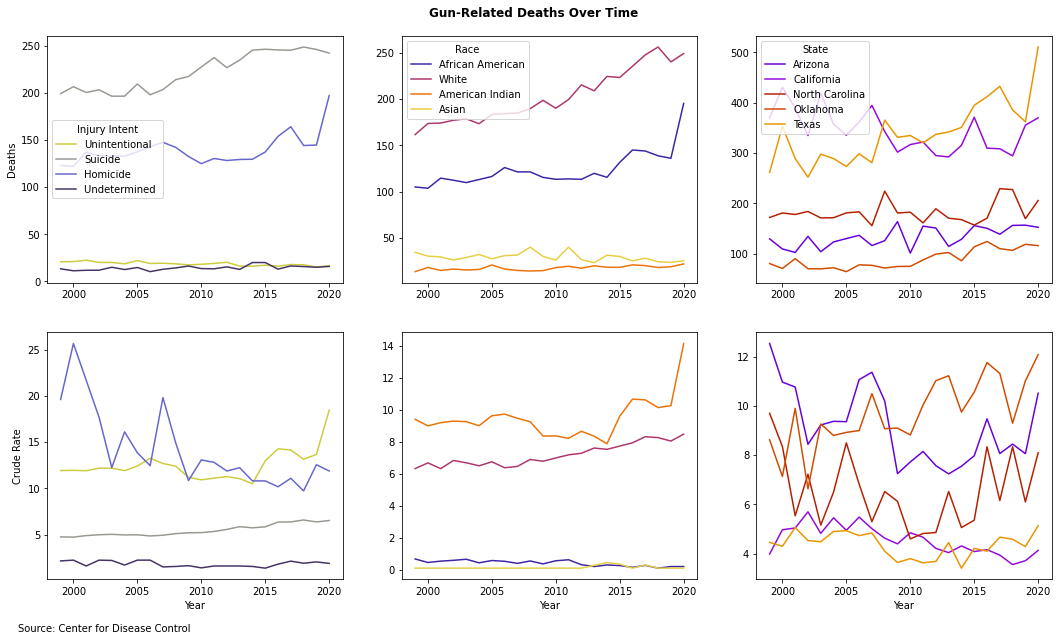

In [85]:
#GUN DEAHTHS OVER TIME
f, axes5 = plt.subplots(2, 3, figsize=(18,10))
sns.lineplot(x="Year", y="Deaths", hue="Injury Intent", data=df, ax = axes5[0][0], palette = 'gist_stern_r', ci = None)
sns.move_legend(axes5[0][0], "center left")
sns.lineplot(x="Year", y="Deaths", hue="Race", data=df, ax = axes5[0][1], palette = 'CMRmap', ci = None)
sns.lineplot(x="Year", y="Deaths", hue='State', data=violent_state, ax = axes5[0][2], palette = 'gnuplot', ci = None)
sns.move_legend(axes5[0][2], "upper left")

sns.lineplot(x="Year", y="Crude Rate", hue="Race", data=df, ax = axes5[1][0], palette = 'gist_stern_r', ci = None, legend = False)
sns.lineplot(x="Year", y="Crude Rate", hue="Injury Intent", data=df, ax = axes5[1][1], palette = 'CMRmap', ci = None, legend = False)
sns.lineplot(x="Year", y="Crude Rate", hue='State', data=violent_state, ax = axes5[1][2], palette = 'gnuplot', ci = None, legend = False)


axes5[0][1].set(ylabel=None)
axes5[0][2].set(ylabel=None)
axes5[1][1].set(ylabel=None)
axes5[1][2].set(ylabel=None)

axes5[0][0].set(xlabel=None)
axes5[0][1].set(xlabel=None)
axes5[0][2].set(xlabel=None)


plt.annotate('Source: Center for Disease Control', xy = (-2.5, -0.2),
            xycoords='axes fraction',
            ha='left',
            va="center",
            fontsize=10)
f.suptitle('Gun-Related Deaths Over Time', y= 0.92, fontweight = 'bold')
